In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import json
import os
import requests
from PIL import Image
from io import BytesIO

# Gathering Data

## Gather1

In [1]:
import pandas as pd
df_S=pd.read_csv(r"C:\Users\lamia\Desktop\twitter-archive-enhanced.csv", sep=',')
df_S.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gather2

In [65]:
df_image=pd.read_csv(r"C:\Users\lamia\Desktop\image-predictions.tsv", sep='\t')
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Gather3

In [125]:
TDF=pd.read_csv(r"C:\Users\lamia\Desktop\tweet-json.TXT",sep='delimeters')
TDF.head(20)

<ipython-input-125-d27e00b78a37>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  TDF=pd.read_csv(r"C:\Users\lamia\Desktop\tweet-json.TXT",sep='delimeters')


,"{""created_at"": ""Tue Aug 01 16:23:56 +0000 2017"", ""id"": 892420643555336193, ""id_str"": ""892420643555336193"", ""full_text"": ""This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"", ""truncated"": false, ""display_text_range"": [0, 85], ""entities"": {""hashtags"": [], ""symbols"": [], ""user_mentions"": [], ""urls"": [], ""media"": [{""id"": 892420639486877696, ""id_str"": ""892420639486877696"", ""indices"": [86, 109], ""media_url"": ""http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg"", ""media_url_https"": ""https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg"", ""url"": ""https://t.co/MgUWQ76dJU"", ""display_url"": ""pic.twitter.com/MgUWQ76dJU"", ""expanded_url"": ""https://twitter.com/dog_rates/status/892420643555336193/photo/1"", ""type"": ""photo"", ""sizes"": {""large"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}, ""thumb"": {""w"": 150, ""h"": 150, ""resize"": ""crop""}, ""small"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}, ""medium"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}}}]}, ""extended_entities"": {""media"": [{""id"": 892420639486877696, ""id_str"": ""892420639486877696"", ""indices"": [86, 109], ""media_url"": ""http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg"", ""media_url_https"": ""https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg"", ""url"": ""https://t.co/MgUWQ76dJU"", ""display_url"": ""pic.twitter.com/MgUWQ76dJU"", ""expanded_url"": ""https://twitter.com/dog_rates/status/892420643555336193/photo/1"", ""type"": ""photo"", ""sizes"": {""large"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}, ""thumb"": {""w"": 150, ""h"": 150, ""resize"": ""crop""}, ""small"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}, ""medium"": {""w"": 540, ""h"": 528, ""resize"": ""fit""}}}]}, ""source"": ""<a href=\""http://twitter.com/download/iphone\"" rel=\""nofollow\"">Twitter for iPhone</a>"", ""in_reply_to_status_id"": null, ""in_reply_to_status_id_str"": null, ""in_reply_to_user_id"": null, ""in_reply_to_user_id_str"": null, ""in_reply_to_screen_name"": null, ""user"": {""id"": 4196983835, ""id_str"": ""4196983835"", ""name"": ""WeRateDogs\u2122 (author)"", ""screen_name"": ""dog_rates"", ""location"": ""DM YOUR DOGS, WE WILL RATE"", ""description"": ""#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com"", ""url"": ""https://t.co/N7sNNHAEXS"", ""entities"": {""url"": {""urls"": [{""url"": ""https://t.co/N7sNNHAEXS"", ""expanded_url"": ""http://weratedogs.com"", ""display_url"": ""weratedogs.com"", ""indices"": [0, 23]}]}, ""description"": {""urls"": []}}, ""protected"": false, ""followers_count"": 3200889, ""friends_count"": 104, ""listed_count"": 2784, ""created_at"": ""Sun Nov 15 21:41:29 +0000 2015"", ""favourites_count"": 114031, ""utc_offset"": null, ""time_zone"": null, ""geo_enabled"": true, ""verified"": true, ""statuses_count"": 5288, ""lang"": ""en"", ""contributors_enabled"": false, ""is_translator"": false, ""is_translation_enabled"": false, ""profile_background_color"": ""000000"", ""profile_background_image_url"": ""http://abs.twimg.com/images/themes/theme1/bg.png"", ""profile_background_image_url_https"": ""https://abs.twimg.com/images/themes/theme1/bg.png"", ""profile_background_tile"": false, ""profile_image_url"": ""http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg"", ""profile_image_url_https"": ""https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg"", ""profile_banner_url"": ""https://pbs.twimg.com/profile_banners/4196983835/1501129017"", ""profile_link_color"": ""F5ABB5"", ""profile_sidebar_border_color"": ""000000"", ""profile_sidebar_fill_color"": ""000000"", ""profile_text_color"": ""000000"", ""profile_use_background_image"": false, ""has_extended_profile"": true, ""default_profile"": false, ""default_profile_image"": false, ""following"": true, ""follow_request_sent"": false, ""no

In [2]:
df_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
df_S.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [5]:
df_S['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [66]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [69]:
df_image['jpg_url'].duplicated().sum()

66

In [70]:
df_image['img_num'].duplicated().sum()

2071

In [126]:
all_columns= pd.Series(list(df_S)+list(df_image)+list(TDF))
all_columns[all_columns.duplicated()]

14    tweet_id
dtype: object

# Assessing data df_S

### Visual assessment
#### accuracy
1-Names with small letters
2-Tweet id is a replicated column in 2 Series(df_S and df_image)
#### validity
3-The rating numerators are greater than the denominators

# Missing Data df_S
### Programmatic assessment
#### completeness:
1-Missing values in: 
in_reply_to_status_id
in_reply_to_user_id
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls (we can't fill it)
#### consistency
2-time to stamp type, in_reply_to_status_id type,in_reply_to_user_id type, retweeted_status_id type, retweeted_status_user_id datatype is not convenient.

3-in reply to user id , retweeted status id, retweeted status timestamp, in reply to status id and retweete status user id are not related to rating
#### validity
4-rating numerator should be 10/10

# Assessing data df_image
### Visual assessment
#### accuracy
1-p1_conf type is not convenient
2-p1_conf, p2_conf, p2_conf have false value
### programatic assessment
3-jpg url have duplicated values

### Cleaning


# Qualitydf_S

twitter_archive
### Define
1-fill missing data
2- adjust columns type
3- correct names in small letters(watched visualy)
4- adjust rating nominator maximum to 10
5-delete useless columns not related to rating
6- merge the two series with common column(Tweet_id)
# Tideness df_S
1- time to stamp includes two values 
2-expanded urls includes 2 values
### Define
separate values in expanded urls in expanded urls and tels
separate values in time to stamp in new date and new time and drop time to stamp

In [63]:
df_S['in_reply_to_status_id'].fillna(df_S['tweet_id']+1, inplace= True)
df_S['retweeted_status_id'].fillna(df_S['in_reply_to_status_id']+2, inplace=True)
df_S['in_reply_to_user_id'].fillna(df_S['in_reply_to_status_id']+3, inplace=True)
df_S['retweeted_status_user_id'].fillna(df_S['in_reply_to_user_id']+4, inplace=True)
df_S['retweeted_status_timestamp'].fillna(0, inplace = True)
df_S.isnull().sum()

tweet_id                       0
in_reply_to_status_id          0
in_reply_to_user_id            0
timestamp                      0
source                         0
text                           0
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 59
rating_numerator               0
rating_denominator             0
name                           0
doggo                          0
floofer                        0
pupper                         0
puppo                          0
dtype: int64

In [7]:
df_S['in_reply_to_status_id']=df_S['in_reply_to_status_id'].astype(int)
df_S['in_reply_to_user_id']=df_S['in_reply_to_user_id'].astype(int)
df_S['retweeted_status_id']=df_S['retweeted_status_id'].astype(int)
df_S['retweeted_status_user_id']=df_S['retweeted_status_user_id'].astype(int)
df_S['timestamp']=pd.to_datetime(df_S['timestamp'])
df_S['retweeted_status_timestamp'] = pd.to_datetime(df_S['retweeted_status_timestamp'], errors='coerce', utc=True)

In [8]:
df_S['name']=df_S['name'].replace('this','This')
df_S['name']=df_S['name'].replace('all','All')

In [32]:
df_S=pd.read_csv(r"C:\Users\lamia\Desktop\twitter-archive-enhanced.csv", sep=',')
df_S['Tel'] = df_S.expanded_urls.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)
df_S['expanded_urls'] = df_S['expanded_urls'].str[0:37]
df_S['timestamp']=pd.to_datetime(df_S['timestamp'])
df_S['new_date'] = [d.date() for d in df_S['timestamp']]
df_S['new_time'] = [d.time() for d in df_S['timestamp']] 
df_S.pop('timestamp')
df_S['new_date']=pd.to_datetime(df_S["new_date"].astype(str)) 
df_S['new_time']=pd.to_datetime(df_S["new_time"].astype(str))
df_S['Tel'].drop_duplicates(inplace=True)
df_S['Tel'].fillna(0)

0       8924206435
1       8921774213
2       8918151813
3       8916895572
4       8913275589
           ...    
2351    6660492481
2352    6660442263
2353    6660334127
2354    6660292850
2355    6660208880
Name: Tel, Length: 2047, dtype: object

In [56]:
df_S.pop('source')
df_S.pop('in_reply_to_user_id')
df_S.pop('retweeted_status_id')
df_S.pop('retweeted_status_user_id')
df_S.pop('retweeted_status_timestamp')
df_S['in_reply_to_status_id']=df_S['in_reply_to_status_id'].astype(int)

# Testing

In [11]:
df_S.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Tel,new_date,new_time
0,892420643555336193,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,Phineas,None,None,None,None,8924206435,2017-08-01,2020-11-30 16:23:56
1,892177421306343426,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,Tilly,None,None,None,None,8921774213,2017-08-01,2020-11-30 00:17:27
2,891815181378084864,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,12,10,Archie,None,None,None,None,8918151813,2017-07-31,2020-11-30 00:18:03
3,891689557279858688,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,Darla,None,None,None,None,8916895572,2017-07-30,2020-11-30 15:58:51
4,891327558926688256,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,12,10,Franklin,None,None,None,None,8913275589,2017-07-29,2020-11-30 16:00:24
5,891087950875897856,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,None,None,None,None,None,8910879508,2017-07-29,2020-11-30 00:08:17
6,890971913173991426,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://gofundme.com/ydvmve-surgery-f,13,10,Jax,None,None,None,None,8909719131,2017-07-28,2020-11-30 16:27:12
7,890729181411237888,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,None,None,None,None,None,8907291814,2017-07-28,2020-11-30 00:22:40
8,890609185150312448,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,13,10,Zoey,None,None,None,None,8906091851,2017-07-27,2020-11-30 16:25:51
9,890240255349198849,-2147483648,-2147483648,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,-2147483648,-2147483648,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/,14,10,Cassie,doggo,None,None,None,8902402553,2017-07-26,2020-11-30 15:59:51


In [12]:
df_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   int32              
 2   in_reply_to_user_id         2356 non-null   int32              
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         2356 non-null   int32              
 6   retweeted_status_user_id    2356 non-null   int32              
 7   retweeted_status_timestamp  2356 non-null   datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

In [18]:
df_S.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Tel,new_date,new_time
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/,13,10,Peaches,None,None,None,None,8001414224,2016-11-20,00:59:15
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/,12,10,None,None,None,pupper,None,8378201676,2017-03-04,00:21:08
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/,10,10,Bookstore,None,None,None,None,7476007694,2016-06-28,01:21:27
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/,11,10,Theodore,None,None,None,None,6848002274,2016-01-06,18:14:31
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/,11,10,None,None,None,None,None,8262404940,2017-01-31,01:27:39


In [24]:
df_S['Tel'].duplicated().sum()

0

In [29]:
df_S['Tel'].isnull().sum()

1

In [62]:
df_S.tail(20)
df_S['rating_numerator'].value_counts()

10    1916
9      158
8      102
7       55
5       37
6       32
3       19
4       17
1        9
2        9
0        2
Name: rating_numerator, dtype: int64

In [63]:
df_S.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [59]:
df_S['rating_numerator'].values[df_S['rating_numerator'] > 10] = 10

# Quality

image-predictions.tsv
### Define
drop duplicated values
change the p1_conf type
drop false value

# cleaning

In [72]:
df_image['jpg_url'].drop_duplicates(inplace= True)

In [ ]:
df_image.drop(df_image[df_image['p1_conf'] == False].index, inplace=True)
df_image.drop(df_image[df_image['p2_conf'] == False].index, inplace=True)
df_image.drop(df_image[df_image['p3_conf'] == False].index, inplace=True)

In [ ]:
df_image['p1_conf']=df_image['p1_conf'].astype(float)

# Testing

In [73]:
df_image['jpg_url'].duplicated().sum()

0

In [124]:
df_image.loc[df_image['p1_conf']==False]
df_image.loc[df_image['p2_conf']==False]
df_image.loc[df_image['p3_conf']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [128]:
df_S['tweet_id']=df_S['tweet_id'].astype(int)
df_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2356 non-null   int32         
 1   in_reply_to_status_id  78 non-null     float64       
 2   text                   2356 non-null   object        
 3   expanded_urls          2297 non-null   object        
 4   rating_numerator       2356 non-null   int64         
 5   rating_denominator     2356 non-null   int64         
 6   name                   2356 non-null   object        
 7   doggo                  2356 non-null   object        
 8   floofer                2356 non-null   object        
 9   pupper                 2356 non-null   object        
 10  puppo                  2356 non-null   object        
 11  Tel                    2190 non-null   object        
 12  new_date               2356 non-null   datetime64[ns]
 13  new

In [18]:
df_image=pd.read_csv(r"C:\Users\lamia\Desktop\image-predictions.tsv", sep='\t')
df_image['tweet_id']=df_image['tweet_id'].astype(int)
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int32  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int32(1), int64(1), object(4)
memory usage: 144.0+ KB


In [ ]:
df1 = pd.merge(df_S,df_image, how = 'left', on = ['tweet_id'])
df1.info()

# Insight & visualization

In [137]:
df1['p1'].value_counts()

minivan                           2
Labrador_retriever                2
golden_retriever                  2
French_bulldog                    2
bustard                           1
Bedlington_terrier                1
Airedale                          1
African_grey                      1
Shetland_sheepdog                 1
collie                            1
Pembroke                          1
bookshop                          1
beagle                            1
ping-pong_ball                    1
window_shade                      1
American_Staffordshire_terrier    1
German_shepherd                   1
Old_English_sheepdog              1
park_bench                        1
Shih-Tzu                          1
basset                            1
pug                               1
Cardigan                          1
Eskimo_dog                        1
Samoyed                           1
Name: p1, dtype: int64

In [136]:
df1['p2'].value_counts()

Cardigan                     3
sports_car                   2
water_bottle                 1
bull_mastiff                 1
Boston_bull                  1
koala                        1
kelpie                       1
dalmatian                    1
silky_terrier                1
Eskimo_dog                   1
Sealyham_terrier             1
Maltese_dog                  1
Arctic_fox                   1
Staffordshire_bullterrier    1
tennis_ball                  1
Chihuahua                    1
borzoi                       1
kuvasz                       1
Afghan_hound                 1
Madagascar_cat               1
Shetland_sheepdog            1
English_springer             1
Irish_setter                 1
standard_poodle              1
studio_couch                 1
beagle                       1
Name: p2, dtype: int64

In [138]:
df1['p3'].value_counts()

Border_collie                     2
boxer                             2
golden_retriever                  2
Siberian_husky                    2
limousine                         2
chow                              1
American_Staffordshire_terrier    1
Boston_bull                       1
Lhasa                             1
Pembroke                          1
German_short-haired_pointer       1
racket                            1
basenji                           1
bull_mastiff                      1
Lakeland_terrier                  1
beacon                            1
goose                             1
Labrador_retriever                1
wire-haired_fox_terrier           1
television                        1
rotisserie                        1
kuvasz                            1
basset                            1
Bernese_mountain_dog              1
Name: p3, dtype: int64

In [147]:
df=df1.groupby(['p1','p2','p3']).rating_numerator.mean()
df

p1                              p2                         p3                            
African_grey                    Madagascar_cat             television                        10
Airedale                        silky_terrier              Lakeland_terrier                  10
American_Staffordshire_terrier  Staffordshire_bullterrier  bull_mastiff                      10
Bedlington_terrier              standard_poodle            wire-haired_fox_terrier            5
Cardigan                        Shetland_sheepdog          Pembroke                          10
Eskimo_dog                      dalmatian                  American_Staffordshire_terrier    10
French_bulldog                  Boston_bull                boxer                             10
                                Chihuahua                  Boston_bull                       10
German_shepherd                 Eskimo_dog                 Siberian_husky                    10
Labrador_retriever              beagle        

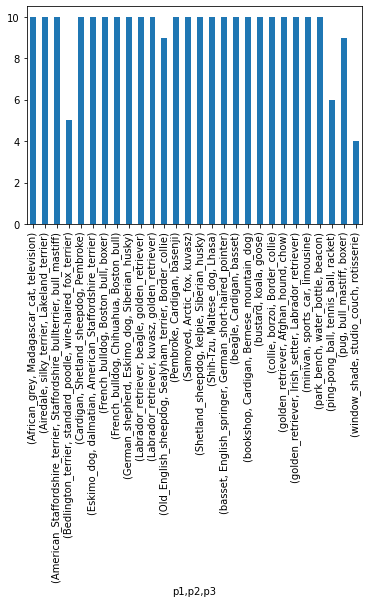

In [148]:
d=df.plot(kind='bar')
d

In [3]:
import pandas as pd
df_S=pd.read_csv(r"C:\Users\lamia\Desktop\twitter-archive-enhanced.csv", sep=',')
df_image=pd.read_csv(r"C:\Users\lamia\Desktop\image-predictions.tsv", sep='\t')
df1 = pd.merge(df_S,df_image, how = 'left', on = ['tweet_id'])
df1.to_csv('twitter_archive_master1.csv', 
                 index=False, encoding = 'utf-8')
df2=df1.groupby(['p1','p2','p3']).mean()
df2


tweet_id  \
p1                p2                 p3                              
Afghan_hound      Saluki             bloodhound       8.413147e+17   
                  basset             Siberian_husky   7.778850e+17   
                  borzoi             doormat          8.127511e+17   
African_crocodile American_alligator mink             6.746648e+17   
African_grey      Madagascar_cat     television       7.623165e+17   
...                                                            ...   
wood_rabbit       tabby              Egyptian_cat     6.707277e+17   
wooden_spoon      sliding_door       grand_piano      8.363805e+17   
wool              fur_coat           kuvasz           7.032685e+17   
                  siamang            gorilla          6.704742e+17   
zebra             tiger              prairie_chicken  6.713902e+17   

                                                      in_reply_to_status_id  \
p1                p2                 p3                                       
Afghan_hound      Saluki             bloodhound                         NaN   
                  basset             Siberian_husky                     NaN   
                  borzoi             doormat                            NaN   
African_crocodile American_alligator mink                               NaN   
African_grey      Madagascar_cat     television                         NaN   
...                                                                     ...   
wood_rabbit       tabby              Egyptian_cat                       NaN   
wooden_spoon      sliding_door       grand_piano                        NaN   
wool              fur_coat           kuvasz                             NaN   
                  siamang            gorilla                            NaN   
zebra             tiger              prairie_chicken                    NaN   

                                                      in_reply_to_user_id  \
p1                p2                 p3                                     
Afghan_hound      Saluki             bloodhound                       NaN   
                  basset             Siberian_husky                   NaN   
                  borzoi             doormat                          NaN   
African_crocodile American_alligator mink                             NaN   
African_grey      Madagascar_cat     television                       NaN   
...                                                                   ...   
wood_rabbit       tabby              Egyptian_cat                     NaN   
wooden_spoon      sliding_door       grand_piano                      NaN   
wool              fur_coat           kuvasz                           NaN   
                  siamang            gorilla                          NaN   
zebra             tiger              prairie_chicken                  NaN   

                                                      retweeted_status_id  \
p1                p2                 p3                                     
Afghan_hound      Saluki             bloodhound                       NaN   
                  basset             Siberian_husky                   NaN   
                  borzoi             doormat                 7.932865e+17   
African_crocodile American_alligator mink                             NaN   
African_grey      Madagascar_cat     television                       NaN   
...                                                                   ...   
wood_rabbit       tabby              Egyptian_cat                     NaN   
wooden_spoon      sliding_door       grand_piano                      NaN   
wool              fur_coat           kuvasz                           NaN   
                  siamang            gorilla                          NaN   
zebra             tiger              prairie_chicken                  NaN   

                                                      retweeted_status_user_id  \
p1                p2             

In [20]:
df3_rating_sort= df2['rating_numerator'].sort_values()
df3_rating_sort

p1                  p2                              p3                            
traffic_light       fountain                        space_shuttle                        0.0
swing               American_Staffordshire_terrier  Staffordshire_bullterrier            0.0
hen                 cock                            partridge                            1.0
paper_towel         mailbox                         seat_belt                            1.0
electric_fan        spotlight                       lampshade                            1.0
                                                                                       ...  
teddy               crib                            chow                               144.0
Labrador_retriever  Chihuahua                       American_Staffordshire_terrier     165.0
lakeside            breakwater                      king_penguin                       204.0
microphone          accordion                       drumstick                   

In [29]:
print(df1.loc[df1.p1=='bow_tie','expanded_urls'])

979     https://twitter.com/dog_rates/status/749981277...
1069    https://twitter.com/dog_rates/status/740365076...
1462    https://twitter.com/dog_rates/status/694905863...
2118    https://twitter.com/dog_rates/status/670420569...
Name: expanded_urls, dtype: object


In [43]:
df_count= df1.groupby(['p1','p2','p3']).count()
df_count

tweet_id  \
p1                p2                 p3                          
Afghan_hound      Saluki             bloodhound              1   
                  basset             Siberian_husky          1   
                  borzoi             doormat                 2   
African_crocodile American_alligator mink                    1   
African_grey      Madagascar_cat     television              1   
...                                                        ...   
wood_rabbit       tabby              Egyptian_cat            1   
wooden_spoon      sliding_door       grand_piano             1   
wool              fur_coat           kuvasz                  1   
                  siamang            gorilla                 1   
zebra             tiger              prairie_chicken         1   

                                                      in_reply_to_status_id  \
p1                p2                 p3                                       
Afghan_hound      Saluki             bloodhound                           0   
                  basset             Siberian_husky                       0   
                  borzoi             doormat                              0   
African_crocodile American_alligator mink                                 0   
African_grey      Madagascar_cat     television                           0   
...                                                                     ...   
wood_rabbit       tabby              Egyptian_cat                         0   
wooden_spoon      sliding_door       grand_piano                          0   
wool              fur_coat           kuvasz                               0   
                  siamang            gorilla                              0   
zebra             tiger              prairie_chicken                      0   

                                                      in_reply_to_user_id  \
p1                p2                 p3                                     
Afghan_hound      Saluki             bloodhound                         0   
                  basset             Siberian_husky                     0   
                  borzoi             doormat                            0   
African_crocodile American_alligator mink                               0   
African_grey      Madagascar_cat     television                         0   
...                                                                   ...   
wood_rabbit       tabby              Egyptian_cat                       0   
wooden_spoon      sliding_door       grand_piano                        0   
wool              fur_coat           kuvasz                             0   
                  siamang            gorilla                            0   
zebra             tiger              prairie_chicken                    0   

                                                      timestamp  source  text  \
p1                p2                 p3                                         
Afghan_hound      Saluki             bloodhound               1       1     1   
                  basset             Siberian_husky           1       1     1   
                  borzoi             doormat                  2       2     2   
African_crocodile American_alligator mink                     1       1     1   
African_grey      Madagascar_cat     television               1       1     1   
...                                                         ...     ...   ...   
wood_rabbit       tabby              Egyptian_cat             1       1     1   
wooden_spoon      sliding_door       grand_piano              1       1     1   
wool              fur_coat           kuvasz                   1       1     1   
                  siamang            gorilla                  1       1     1   
zebra             tiger              prairie_chicken          1       1     1   

                                                      retweeted_status_id  \
p1                p2              

In [55]:
df2=df2['rating_numerator']
df2

p1                 p2                  p3             
Afghan_hound       Saluki              bloodhound         13.0
                   basset              Siberian_husky      3.0
                   borzoi              doormat            13.0
African_crocodile  American_alligator  mink               10.0
African_grey       Madagascar_cat      television         11.0
                                                          ... 
wood_rabbit        tabby               Egyptian_cat       10.0
wooden_spoon       sliding_door        grand_piano        12.0
wool               fur_coat            kuvasz             12.0
                   siamang             gorilla            10.0
zebra              tiger               prairie_chicken     7.0
Name: rating_numerator, Length: 1742, dtype: float64

In [54]:
df3=df_count['rating_numerator']
df3

p1                 p2                  p3             
Afghan_hound       Saluki              bloodhound         1
                   basset              Siberian_husky     1
                   borzoi              doormat            2
African_crocodile  American_alligator  mink               1
African_grey       Madagascar_cat      television         1
                                                         ..
wood_rabbit        tabby               Egyptian_cat       1
wooden_spoon       sliding_door        grand_piano        1
wool               fur_coat            kuvasz             1
                   siamang             gorilla            1
zebra              tiger               prairie_chicken    1
Name: rating_numerator, Length: 1742, dtype: int64

In [57]:
df = pd.DataFrame()
df['df3'] = df3
df['df2'] = df2
df

df3   df2
p1                p2                 p3                        
Afghan_hound      Saluki             bloodhound         1  13.0
                  basset             Siberian_husky     1   3.0
                  borzoi             doormat            2  13.0
African_crocodile American_alligator mink               1  10.0
African_grey      Madagascar_cat     television         1  11.0
...                                                   ...   ...
wood_rabbit       tabby              Egyptian_cat       1  10.0
wooden_spoon      sliding_door       grand_piano        1  12.0
wool              fur_coat           kuvasz             1  12.0
                  siamang            gorilla            1  10.0
zebra             tiger              prairie_chicken    1   7.0

[1742 rows x 2 columns]

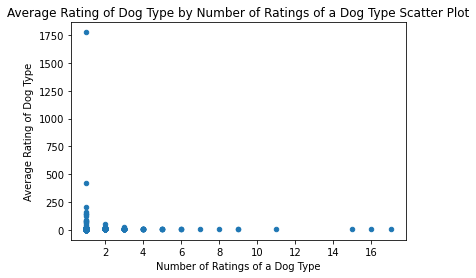

In [61]:
import matplotlib.pyplot as plt
df.plot(x='df3', y='df2', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()